## **Skope rules**

A very similar framework is skope-rules, a Python module that also extracts rules from ensembles. It differs in the way it learns the final rules: 

1. First, skope-rules remove low-performing rules, based on recall and precision thresholds. 
2. Then, duplicate and similar rules are removed by performing a selection based on the diversity of logical terms (variable + larger/smaller operator) and performance (F1-score) of the rules. 

This final step does not rely on using Lasso, but considers only the out-of-bag F1-score and the logical terms which form the rules.

## **Installation**

Follow the instructions in https://github.com/scikit-learn-contrib/skope-rules

In [4]:
#pip install skope-rules

     |████████████████████████████████| 2.0MB 2.2MB/s eta 0:00:01
  Created wheel for skope-rules: filename=skope_rules-1.0.0-cp37-none-any.whl size=14592 sha256=1cb1e6f1368dbf88be180810cbba4aac6d58d8185ac6a49b7a028861d6c94385
  Stored in directory: /home/erikapat/.cache/pip/wheels/3e/8d/56/464f328ff3200c785626967ee39a6b2efc455469dab615f03e
Successfully built skope-rules
Note: you may need to restart the kernel to use updated packages.


In [5]:
from sklearn.datasets import load_iris
from skrules import SkopeRules

dataset = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
clf = SkopeRules(max_depth_duplication=2,
                 n_estimators=30,
                 precision_min=0.3,
                 recall_min=0.1,
                 feature_names=feature_names)

for idx, species in enumerate(dataset.target_names):
    X, y = dataset.data, dataset.target
    clf.fit(X, y == idx)
    rules = clf.rules_[0:3]
    print("Rules for iris", species)
    for rule in rules:
        print(rule)
    print()
    print(20*'=')
    print()

/home/erikapat/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Rules for iris setosa
('petal_length <= 2.449999988079071', (1.0, 1.0, 25))
('petal_width <= 0.75', (1.0, 1.0, 7))


Rules for iris versicolor
('petal_length <= 5.450000047683716 and petal_width <= 1.6500000357627869 and petal_width > 0.800000011920929', (0.9545454545454546, 1.0, 1))
('petal_length > 2.449999988079071 and petal_width <= 1.75 and sepal_length <= 7.099999904632568', (0.9199363732767762, 0.975551580202743, 2))
('petal_length <= 4.8500001430511475 and petal_length > 2.449999988079071 and sepal_length > 4.950000047683716', (0.9590840840840841, 0.8862179487179487, 2))


Rules for iris virginica
('petal_length > 4.75 and petal_width > 1.75', (0.9736659736659736, 0.9134146341463415, 2))
('petal_width > 1.75', (0.9810350598276295, 0.8997915811596355, 7))
('petal_length > 5.049999952316284', (0.9717806041335453, 0.8210436755530346, 2))




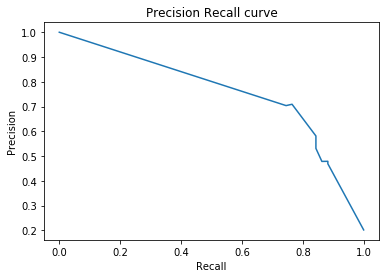

In [7]:
from sklearn.datasets import load_boston
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
from skrules import SkopeRules

dataset = load_boston()
clf = SkopeRules(max_depth_duplication=None,
                 n_estimators=30,
                 precision_min=0.2,
                 recall_min=0.01,
                 feature_names=dataset.feature_names)

X, y = dataset.data, dataset.target > 25
X_train, y_train = X[:len(y)//2], y[:len(y)//2]
X_test, y_test = X[len(y)//2:], y[len(y)//2:]
clf.fit(X_train, y_train)
y_score = clf.score_top_rules(X_test) # Get a risk score for each test example
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall curve')
plt.show()